# Inference for ConsisLoRA

In [ ]:
import torch
import matplotlib.pyplot as plt
from utils import load_pil_image
from diffusers import EulerDiscreteScheduler
from pipeline_demo import StableDiffusionXLPipelineLoraGuidance

model_id = "stabilityai/stable-diffusion-xl-base-1.0"
device = "cuda"
dtype = torch.float16

pipeline = StableDiffusionXLPipelineLoraGuidance.from_pretrained(
    model_id, 
    torch_dtype=dtype,
).to(device)

pipeline.scheduler = EulerDiscreteScheduler.from_config(
    pipeline.scheduler.config,
    timestep_spacing="trailing"
)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

# Style Transfer

In [ ]:
# adjust image name according to your needs
content_img_name = "London_eye"        # see "data_demo/content"
style_img_name = "antimonocromatismo"  # see "data_demo/style"

content_lora_path = f"chenblin26/ConsisLoRA-{content_img_name}"
style_lora_path = f"chenblin26/ConsisLoRA-{style_img_name}"

# load ConsisLora
pipeline.unload_lora_checkpoint()
pipeline.load_lora_checkpoint(content_lora_path, style_lora_path)

Loaded lora weights of the content image from chenblin26/ConsisLoRA-London_eye
Loaded lora weights of the style image from chenblin26/ConsisLoRA-antimonocromatismo


  0%|          | 0/30 [00:00<?, ?it/s]

Loaded input image of size ((1024, 1024)) from data_demo/content/London_eye.jpg
Loaded input image of size ((512, 512)) from data_demo/style/antimonocromatismo.jpg


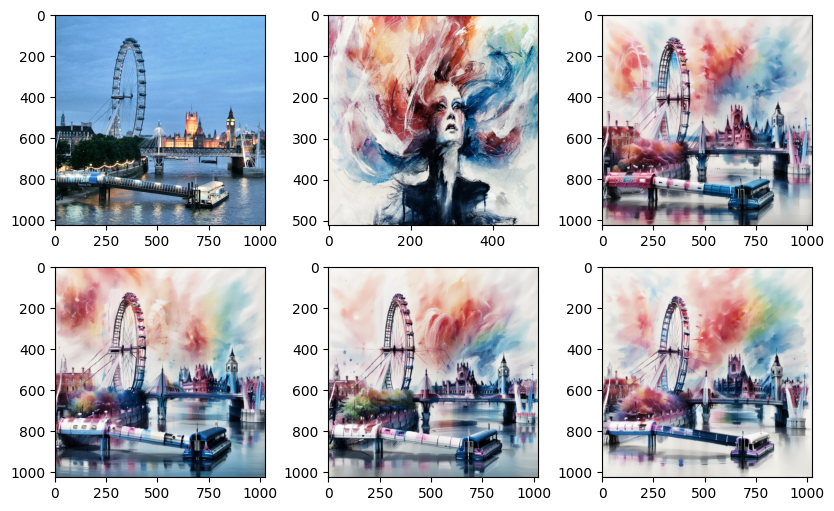

In [242]:
num_images_per_prompt = 4 # adjust according to VRAM size
style_lora_scaling = 1. # you can adjust to control style strength
generator = torch.manual_seed(29) # seed

images = pipeline(
    prompt="a [c] in the style of [v]", 
    lora_scaling = [1., style_lora_scaling],
    guidance_scale=7.5,
    num_inference_steps=30, 
    # add_positive_content_prompt="a [c]",
    # add_negative_content_prompt="a [v]",
    # add_positive_style_prompt="an image in the style of [v]",
    # add_negative_style_prompt="an image in the style of [c]",    
    # content_guidance_scale=0.,                                 # style guidance
    # style_guidance_scale=0.,                                   # content guidance 
    num_images_per_prompt=num_images_per_prompt, 
    generator=generator
).images

content_img_path = f"data_demo/content/{content_img_name}.jpg"
style_img_path = f"data_demo/style/{style_img_name}.jpg"
content_img = load_pil_image(content_img_path)
style_img = load_pil_image(style_img_path)

_, ax = plt.subplots(2, 3, figsize=(10, 6))
ax[0, 0].imshow(content_img)
ax[0, 1].imshow(style_img)
ax[0, 2].imshow(images[0])
ax[1, 0].imshow(images[1])
ax[1, 1].imshow(images[2])
ax[1, 2].imshow(images[3])
plt.show()

# Use content LoRA only

In [243]:
# adjust image name according to your needs
content_img_name = "London_eye"        # see "data_demo/content"
content_lora_path = f"chenblin26/ConsisLoRA-{content_img_name}"

pipeline.unload_lora_checkpoint()
pipeline.load_lora_checkpoint(content_image_lora_path=content_lora_path)

Loaded lora weights of the content image from chenblin26/ConsisLoRA-London_eye


  0%|          | 0/30 [00:00<?, ?it/s]

Loaded input image of size ((1024, 1024)) from data_demo/content/London_eye.jpg


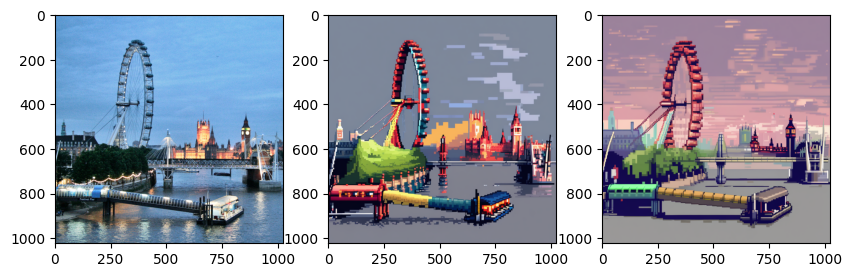

In [244]:
num_images_per_prompt = 2 # adjust according to VRAM size
generator = torch.manual_seed(29) # seed

images = pipeline(
    prompt="a [c] in pixel art style", 
    lora_scaling = [1., 0.],
    guidance_scale=7.5,
    num_inference_steps=30, 
    num_images_per_prompt=num_images_per_prompt, 
    generator=generator
).images

content_img_path = f"data_demo/content/{content_img_name}.jpg"
content_img = load_pil_image(content_img_path)

_, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].imshow(content_img)
ax[1].imshow(images[0])
ax[2].imshow(images[1])
plt.show()

# Use style LoRA only

In [245]:
# adjust image name according to your needs
style_img_name = "antimonocromatismo"  # see "data_demo/style"
style_lora_path = f"chenblin26/ConsisLoRA-{style_img_name}"

pipeline.unload_lora_checkpoint()
pipeline.load_lora_checkpoint(style_image_lora_path=style_lora_path)

Loaded lora weights of the style image from chenblin26/ConsisLoRA-antimonocromatismo


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Loaded input image of size ((512, 512)) from data_demo/style/antimonocromatismo.jpg


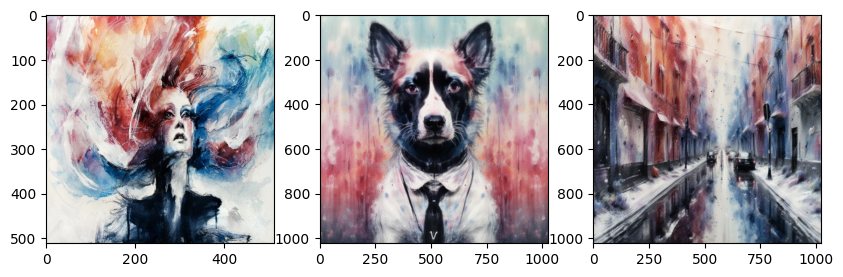

In [250]:
num_images_per_prompt = 1 # adjust according to VRAM size
generator = torch.manual_seed(29) # seed

prompts = ["a dog in the style of [v]", "a street in the style of [v]"]
style_lora_scaling = 1.2 # you can adjust to control style strength

images = [ 
    pipeline(
        prompt=prompt, 
        lora_scaling = [0., style_lora_scaling],
        guidance_scale=7.5,
        num_inference_steps=30, 
        num_images_per_prompt=num_images_per_prompt, 
        generator=generator
    ).images[0] for prompt in prompts
]

style_img_path = f"data_demo/style/{style_img_name}.jpg"
style_img = load_pil_image(style_img_path)

_, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].imshow(style_img)
ax[1].imshow(images[0])
ax[2].imshow(images[1])
plt.show()